<a href="https://colab.research.google.com/github/Shag0r/BANK/blob/main/Crime_analysis_and_murder_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary librais for data

1. pandas (pd): Data manipulation library for Python, offering DataFrame structures.
2. numpy (np): Fundamental for scientific computing, supports arrays and matrices.
3. seaborn (sns): Statistical data visualization library based on Matplotlib.
4. matplotlib.pyplot (plt): Comprehensive plotting library for static, animated, and interactive visualizations.
5. plotly.express (px): High-level interface for quick creation of interactive visualizations.
6. plotly.graph_objects (go): Lower-level API for complex and customized visualizations in Plotly.
7. plotly.tools & plotly.subplots: Utilities for managing multiple subplots in Plotly.
8. plotly.offline.iplot:Renders Plotly plots in offline environments, particularly in Jupyter notebooks.
9. init_notebook_mode: Initializes notebook mode for interactive Plotly visualizations in Jupyter.
10. warnings: Python module for issuing and handling warnings during code execution.
11. WordCloud: Library for generating visual representations of text data using word clouds.
12. STOPWORDS: Set of common words excluded in word cloud generation.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

Load Data


In [75]:


df = pd.read_csv('/content/crime_data_bangladesh.csv')
df.head()

area_name  year  dacoity  robbery   murder  speedy_trial  \
0       dhaka metropolitan  2010       47       220     245           363   
1  chittagong metropolitan  2010       16       108      94            31   
2      khulna metropolitan  2010        3         9      29            25   
3    rajshahi metropolitan  2010        4        20      21             9   
4     barisal metropolitan  2010        8        12      19            21   

   riot   woman_child_Repression  kidnapping  police_assault  burglary  theft  \
0      3                    1370         139             155       555   1915   
1      7                     455          37              31       123    314   
2      0                     153          11               4        65     91   
3     15                     157           9              12        53    106   
4      0                     112           6               8        24     83   

   other_cases  recovery_cases_arms_act  recovery_cases_explosive  \
0         7228                      518                        82   
1         1831                       51                         0   
2          551                       19                         2   
3          578                        3                         4   
4          557                       17                         0   

   recovery_cases_narcotics  recovery_cases_smuggling  
0                     10535                       144  
1                       866                        99  
2                       792                        13  
3                       332                       248  
4                       155                       117

Data type


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   area_name                 146 non-null    object
 1   year                      146 non-null    int64 
 2   dacoity                   146 non-null    int64 
 3   robbery                   146 non-null    int64 
 4   murder                    146 non-null    int64 
 5   speedy_trial              146 non-null    int64 
 6   riot                      146 non-null    int64 
 7   woman_child_Repression    146 non-null    int64 
 8   kidnapping                146 non-null    int64 
 9   police_assault            146 non-null    int64 
 10  burglary                  146 non-null    int64 
 11  theft                     146 non-null    int64 
 12  other_cases               146 non-null    int64 
 13  recovery_cases_arms_act   146 non-null    int64 
 14  recovery_cases_explosive  

Count of missing values for each column in the DataFrame

In [77]:
df.isna().sum()

area_name                   0
year                        0
dacoity                     0
robbery                     0
murder                      0
speedy_trial                0
riot                        0
woman_child_Repression      0
kidnapping                  0
police_assault              0
burglary                    0
theft                       0
other_cases                 0
recovery_cases_arms_act     0
recovery_cases_explosive    0
recovery_cases_narcotics    0
recovery_cases_smuggling    0
dtype: int64

In this case, there are no missing values in any of the columns since all counts are zero

In [78]:
df.describe()

year     dacoity    robbery        murder  speedy_trial  \
count   146.000000  146.000000  146.000000   146.000000    146.000000   
mean   2014.746575   32.143836   56.232877   248.856164     93.589041   
std       2.900206   42.779787   62.354718   307.630342    118.006351   
min    2010.000000    0.000000    0.000000     0.000000      0.000000   
25%    2012.000000    3.000000   11.000000    24.250000      9.250000   
50%    2015.000000   16.500000   30.000000   142.500000     51.500000   
75%    2017.000000   44.750000   73.750000   348.000000    131.750000   
max    2019.000000  184.000000  294.000000  1395.000000    563.000000   

            riot   woman_child_Repression  kidnapping  police_assault  \
count  146.000000              146.000000  146.000000      146.000000   
mean     5.342466             1199.321918   46.260274       42.808219   
std      8.881160             1374.987965   52.556709       55.310823   
min      0.000000                0.000000    0.000000        0.000000   
25%      0.000000              124.250000    7.000000        8.000000   
50%      1.000000              600.000000   20.500000       20.500000   
75%      7.000000             1904.000000   68.750000       46.750000   
max     56.000000             5115.000000  204.000000      336.000000   

        burglary        theft   other_cases  recovery_cases_arms_act  \
count  146.00000   146.000000    146.000000               146.000000   
mean   163.80137   454.527397   5257.595890               117.547945   
std    189.12319   537.204144   5833.566608               150.240088   
min      0.00000     2.000000      9.000000                 0.000000   
25%     32.25000    78.000000    493.250000                15.250000   
50%     77.50000   259.000000   3234.500000                37.000000   
75%    214.00000   545.000000   8468.250000               229.500000   
max    686.00000  2240.000000  22429.000000               723.000000   

       recovery_cases_explosive  recovery_cases_narcotics  \
count                146.000000                146.000000   
mean                  35.547945               3473.376712   
std                   59.904186               4406.777896   
min                    0.000000                 44.000000   
25%                    2.000000                451.500000   
50%                    9.500000               1649.500000   
75%                   50.500000               4574.500000   
max                  387.000000              22682.000000   

       recovery_cases_smuggling  
count                146.000000  
mean                 364.383562  
std                  580.318417  
min                    0.000000  
25%                   19.250000  
50%                  116.000000  
75%                  275.750000  
max                 2509.000000

Summary statistics of the numerical columns in the DataFrame df. It includes count (number of non-null values), mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numerical column.

The data spans from 2010 to 2019, with no missing values. Crime counts (e.g., dacoity, robbery, murder) vary widely, as indicated by large standard deviations. Recovery cases and incidents like speedy trials show notable variability. Quartile values offer insights into the distribution of events and recovery cases.


In [79]:
def plot_treemap(col):
    fig = px.treemap(df, path=['area_name'], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

The function `plot_treemap(col)` generates a treemap using Plotly Express, visualizing hierarchical data based on 'area_name' with tile sizes determined by the specified numerical column (`col`).

**Distribution of the number of dacoity cases by year**

Line plot  to display the distribution of dacoity cases over the years for different areas

In [80]:
plt.figure(figsize=(20,10))
sns.set_palette('pastel')
plt.title('Distribution of the number of dacoity cases by year',fontsize=14)
sns.lineplot(x = 'year', y = 'dacoity', data = df, hue='area_name')
plt.show()

 Depict the distribution of dacoity cases over the years.

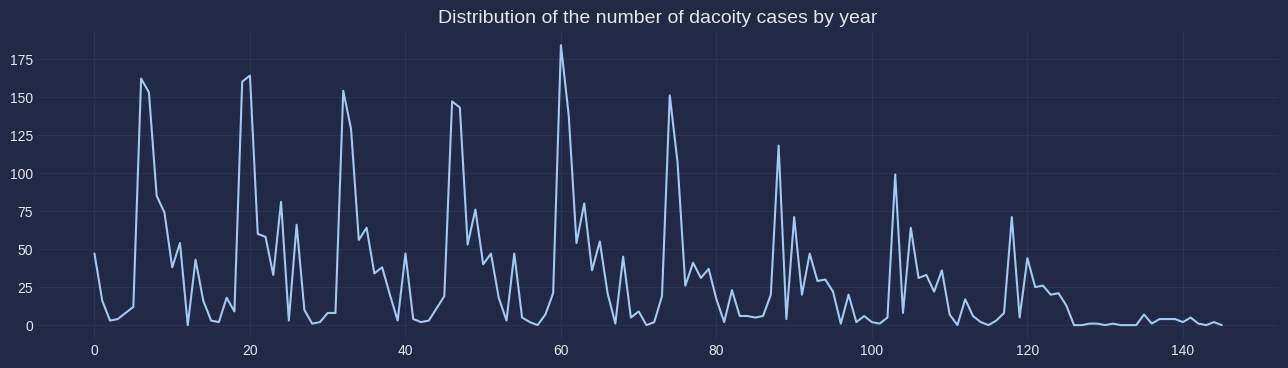

In [81]:
plt.figure(figsize=(16,4));
sns.set_palette('pastel')
plt.title('Distribution of the number of dacoity cases by year',fontsize=14)
plt.plot(df.dacoity)
plt.show()

In [82]:
pivot_table = df.pivot_table(index='area_name', columns='year', values='dacoity', aggfunc='sum', fill_value=0)

# Add a 'Total' column for each row
pivot_table['Total'] = pivot_table.sum(axis=1)

# Display the modified pivot table
print(pivot_table)


year                     2010  2011  2012  2013  2014  2015  2016  2017  2018  \
area_name                                                                       
barisal division           38    33    34    40    36    31    29    22    20   
barisal metropolitan        8    18     8    11     7     2     6     1     3   
chittagong division       153   164   129   143   138   107    71    64    44   
chittagong metropolitan    16    16    10     4     5     5     6     2     6   
dhaka division            162   160   154   147   184   151   118    99    71   
dhaka metropolitan         47    43    66    47    47    45    23    20    17   
gazipur  metropolitan       0     0     0     0     0     0     0     0     0   
khulna division            74    58    64    76    80    41    47    33    26   
khulna metropolitan         3     3     1     2     2     9     6     6     2   
mymensingh division         0     0     0     0     0     0     4     8     5   
railway range               

Distribution of the number of robbery cases by year

In [83]:
df.rename(columns={df.columns[3]: 'robbery'}, inplace=True)

In [84]:
plt.figure(figsize=(15,10))
sns.set_palette('pastel')
plt.title('Distribution of the number of robbery cases by year',fontsize=14)
sns.histplot(x = 'year', y = 'robbery', data = df, hue='area_name')
plt.show()

In [85]:
plt.figure(figsize=(16,4));
sns.set_palette('pastel')
plt.title('Distribution of the number of robbery cases by year',fontsize=14);
plt.hist(df.robbery)
plt.show()

In [86]:
pivot_table = df.pivot_table(index='area_name', columns='year', values='robbery', aggfunc='sum', fill_value=0)

# Add a 'Total' column for each row
pivot_table['Total'] = pivot_table.sum(axis=1)

# Display the modified pivot table
print(pivot_table)


year                     2010  2011  2012  2013  2014  2015  2016  2017  2018  \
area_name                                                                       
barisal division           37    43    61    31    37    47    36    36    24   
barisal metropolitan       12     8     9    11    16    11     7     8     8   
chittagong division       122   116   103   132   169   133   105    74    84   
chittagong metropolitan   108    66    66    55    63    61    58    71    65   
dhaka division            199   174   150   175   221   164   127   132    96   
dhaka metropolitan        220   294   222   241   265   205   131   103    83   
gazipur  metropolitan       0     0     0     0     0     0     0     0     4   
khulna division           125   124   151   126   125   112    80    51    54   
khulna metropolitan         9    13    18    30    29    15    11     9     6   
mymensingh division         0     0     0     0     0     0    15    16    10   
railway range               

Distribution of the number of murder cases by year

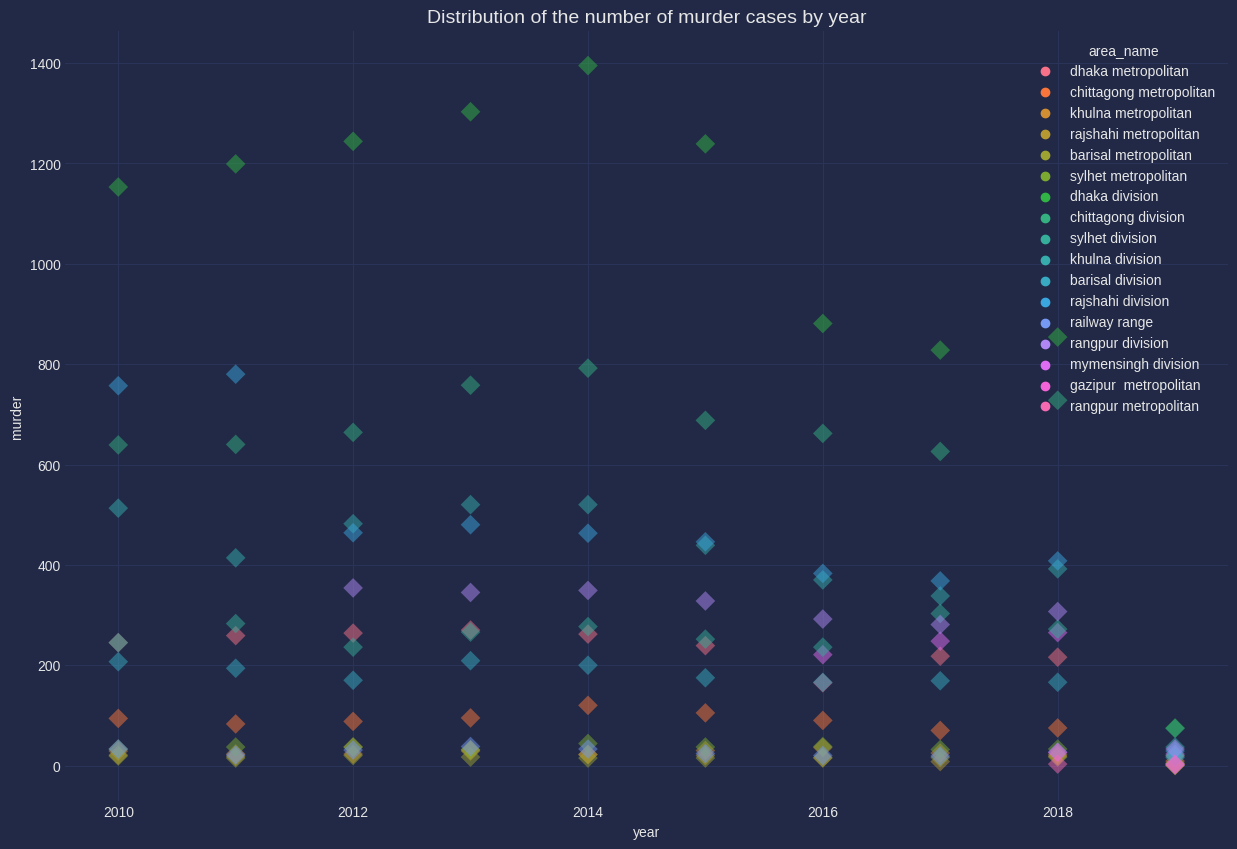

In [87]:
plt.figure(figsize=(15,10))
sns.set_palette('pastel')
plt.title('Distribution of the number of murder cases by year',fontsize=14)
sns.scatterplot(x = 'year', y = 'murder', data = df, hue='area_name', s=100, marker='D', linewidth=0, alpha=0.5)
plt.show()

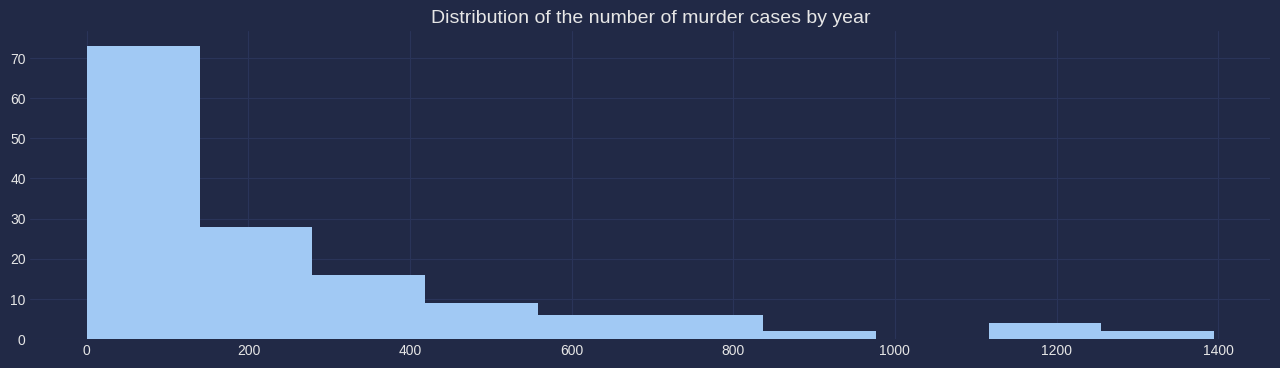

In [88]:
plt.figure(figsize=(16,4));
sns.set_palette('pastel')
plt.title('Distribution of the number of murder cases by year',fontsize=14);
plt.hist(df.murder)
plt.show()

In [89]:
pivot_table = df.pivot_table(index='area_name', columns='year', values='murder', aggfunc='sum', fill_value=0)

# Add a 'Total' column for each row
pivot_table['Total'] = pivot_table.sum(axis=1)

# Display the modified pivot table
print(pivot_table)

year                     2010  2011  2012  2013  2014  2015  2016  2017  2018  \
area_name                                                                       
barisal division          207   194   170   209   200   175   166   169   166   
barisal metropolitan       19    15    20    17    15    15    16    16    17   
chittagong division       639   640   664   758   792   688   662   626   728   
chittagong metropolitan    94    83    88    95   120   105    90    70    75   
dhaka division           1153  1199  1244  1303  1395  1239   881   828   854   
dhaka metropolitan        245   259   264   270   262   239   165   218   216   
gazipur  metropolitan       0     0     0     0     0     0     0     0    26   
khulna division           513   414   482   520   520   439   370   338   392   
khulna metropolitan        29    23    23    31    22    30    36    25    19   
mymensingh division         0     0     0     0     0     0   221   248   265   
railway range              3

Distribution of the number of cases of a speedy trial by year

In [90]:
plt.figure(figsize=(15,10))
sns.set_palette('pastel')
plt.title('Distribution of the number of cases of a speedy trial by year',fontsize=14)
sns.barplot(x = 'year', y = 'speedy_trial', data = df, hue='area_name')
plt.show()

In [91]:
plt.figure(figsize=(16,4));
sns.distplot(df['speedy_trial'],bins=30)
plt.title('Distribution of the number of cases of a speedy trial by year',fontsize=14)
plt.show()

In [92]:

pivot_table = df.pivot_table(index='area_name', columns='year', values='speedy_trial', aggfunc='sum', fill_value=0)

# Add a 'Total' column for each row
pivot_table['Total'] = pivot_table.sum(axis=1)

# Display the modified pivot table
print(pivot_table)

year                     2010  2011  2012  2013  2014  2015  2016  2017  2018  \
area_name                                                                       
barisal division          112   473   232   115    51    58    52    62    55   
barisal metropolitan       21    12     7     8     3     5     8     4     6   
chittagong division       245   241   267   262   193   151   138   114   110   
chittagong metropolitan    31    43    74    57    52    67    63    80   100   
dhaka division            362   361   426   451   456   563   162   131   105   
dhaka metropolitan        363   324   388   338   332   226   217   202   216   
gazipur  metropolitan       0     0     0     0     0     0     0     0     4   
khulna division           110   105   153   181   277   151    88    62    27   
khulna metropolitan        25    17    14    23    17    19    19    19    18   
mymensingh division         0     0     0     0     0     0    97   107    54   
railway range               

Distribution of the number of cases of suppression of women and children by year

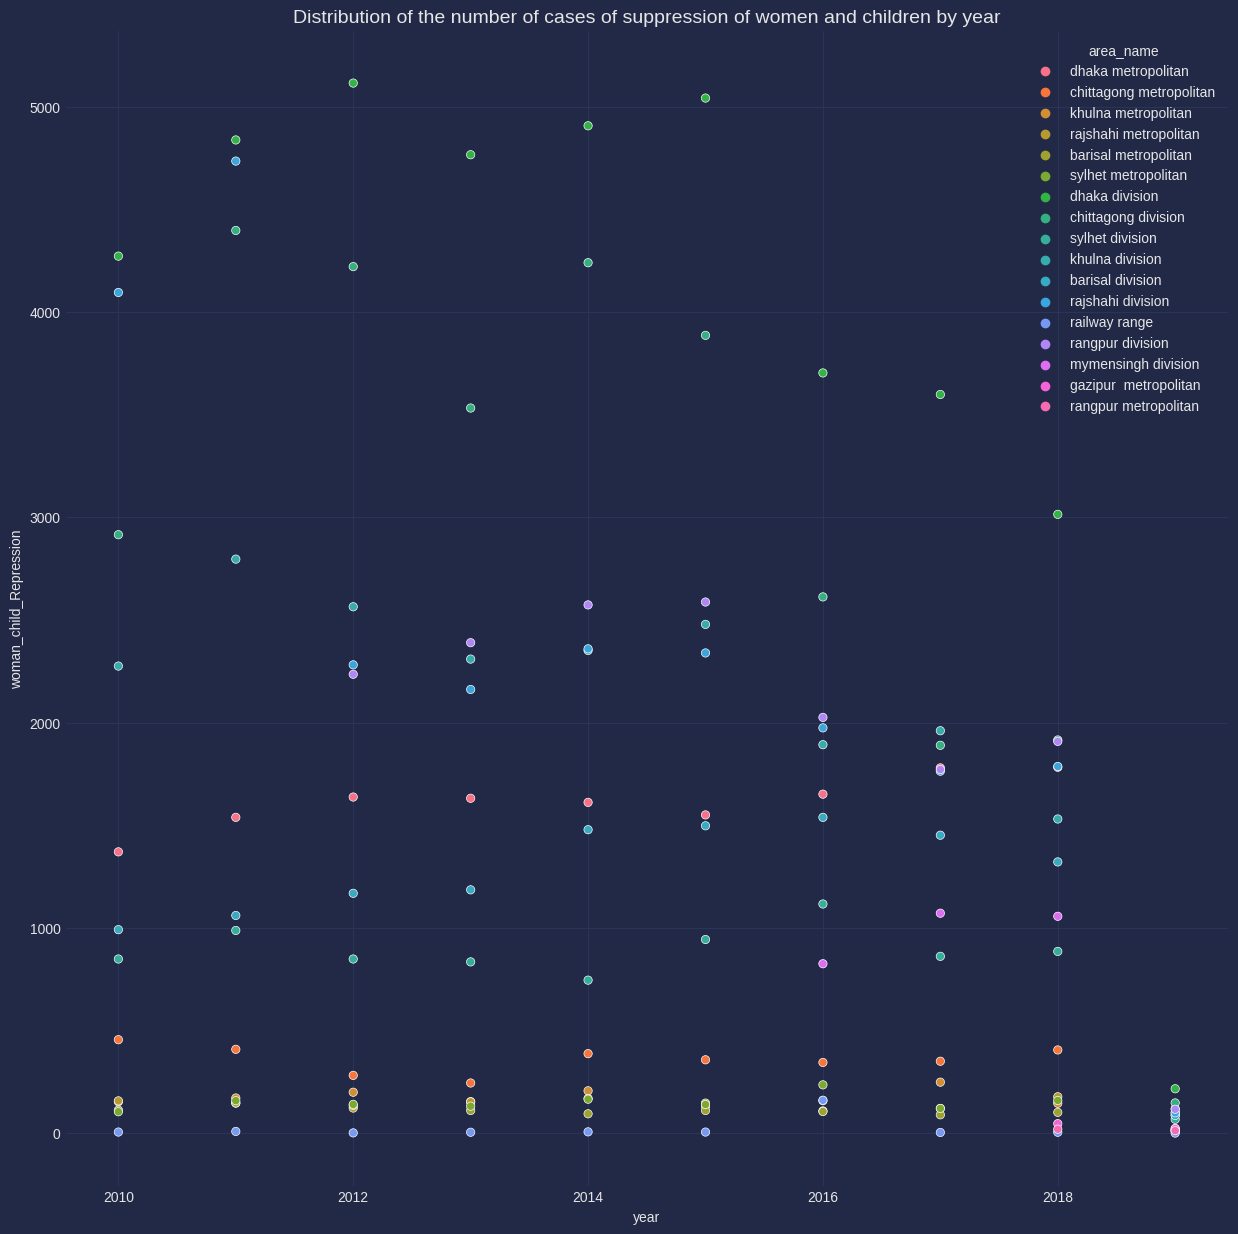

In [93]:
plt.figure(figsize=(15,15))
sns.set_palette('pastel')
plt.title('Distribution of the number of cases of suppression of women and children by year',fontsize=14)
sns.scatterplot(x = 'year', y = 'woman_child_Repression', data = df, hue='area_name')
plt.show()

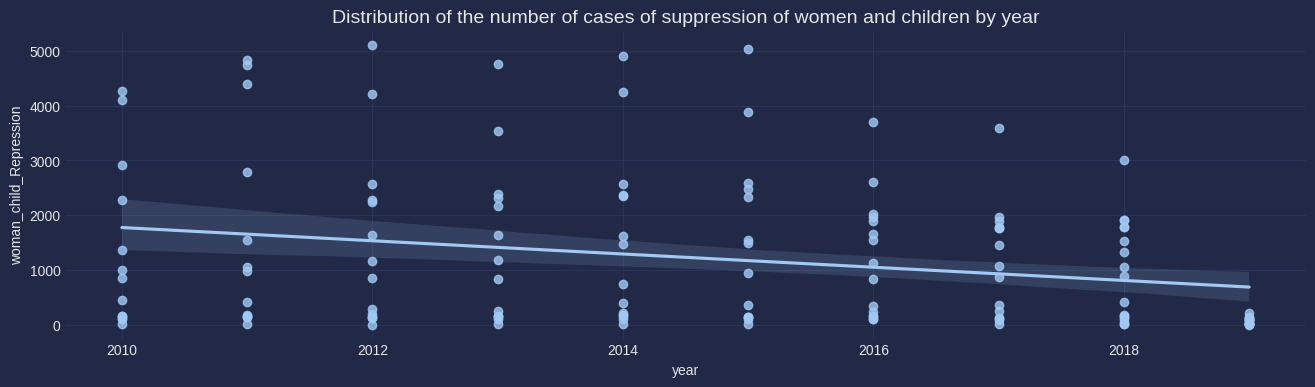

In [94]:
plt.figure(figsize=(16,4))
sns.set_palette('pastel')
plt.title('Distribution of the number of cases of suppression of women and children by year',fontsize=14)
sns.regplot(x = 'year', y = 'woman_child_Repression', data = df)
plt.show()

In [95]:


pivot_table = df.pivot_table(index='area_name', columns='year', values='woman_child_Repression', aggfunc='sum', fill_value=0)

# Add a 'Total' column for each row
pivot_table['Total'] = pivot_table.sum(axis=1)

# Display the modified pivot table
print(pivot_table)


year                     2010  2011  2012  2013  2014  2015  2016  2017  2018  \
area_name                                                                       
barisal division          991  1060  1168  1185  1478  1497  1538  1451  1321   
barisal metropolitan      112   147   135   110    94   110   105    89   101   
chittagong division      2915  4397  4221  3532  4240  3886  2612  1889  1915   
chittagong metropolitan   455   408   281   244   387   357   344   350   405   
dhaka division           4272  4838  5115  4766  4907  5042  3703  3598  3014   
dhaka metropolitan       1370  1538  1637  1631  1611  1550  1651  1779  1782   
gazipur  metropolitan       0     0     0     0     0     0     0     0    46   
khulna division          2275  2796  2564  2309  2351  2478  1892  1960  1530   
khulna metropolitan       153   171   199   153   206   146   158   248   145   
mymensingh division         0     0     0     0     0     0   825  1071  1056   
railway range               

Correlations analysis

In [96]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Murder Prediction

In [97]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_copy.columns:
    if df_copy[i].dtype == 'object':
        df_copy[i] = le.fit_transform(df_copy[i])

In [98]:
X = df_copy.drop('murder',axis=1)
y = df_copy['murder']

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((116, 16), (116,), (30, 16), (30,))

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.head()

0         1         2         3         4         5         6   \
0  0.0625  0.000000  0.048780  0.040816  0.037300  0.000000  0.021896   
1  0.3125  0.222222  0.402439  0.755102  0.689165  0.196429  0.320039   
2  0.0000  0.888889  0.121951  0.081633  0.097691  0.000000  0.258260   
3  0.8750  0.888889  0.006098  0.003401  0.003552  0.000000  0.003715   
4  0.7500  0.111111  0.012195  0.047619  0.005329  0.053571  0.028543   

         7         8         9         10        11        12        13  \
0  0.029412  0.023810  0.034985  0.036193  0.024442  0.029260  0.000000   
1  0.730392  0.404762  0.862974  1.000000  0.369625  0.488812  0.242894   
2  0.098039  0.059524  0.192420  0.090706  0.221499  0.092943  0.144703   
3  0.039216  0.005952  0.004373  0.006702  0.003613  0.003442  0.002584   
4  0.078431  0.032738  0.080175  0.044236  0.029260  0.013769  0.002584   

         14        15  
0  0.004903  0.051406  
1  0.366684  0.043497  
2  0.191713  0.000879  
3  0.007024  0.000000  
4  0.009232  0.087434

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [102]:
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
etree = ExtraTreesRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()


Models = [lr,tree,rf,etree,gb,xgb,knn]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))

    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))
    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.9726470582853799
Predictions are : [  69.85075607  303.43459898    9.06195807  956.85730928   26.21070689
  728.80793528  -14.54505498  373.19403394  394.83855742   43.98440071
  -48.67080066   68.79505438   50.79997535  331.00718521   42.29978487
  349.41409819 1400.75307197   32.90146254   -6.38587145   13.83445754
   -1.66232117  517.40040615  653.14048475  -12.91953033   20.72622648
  301.46089401  340.2184671     3.07002826   31.41100573  423.82145796]
R2 score is : 0.9344197048888819
MAE : 65.42100474832411
MSE : 7833.119212011375
RMSE : 88.50491066608323
           Model Name  R2 score        MAE          MSE       RMSE
0  LinearRegression()   0.93442  65.421005  7833.119212  88.504911
Model is: DecisionTreeRegressor()
Training score : 1.0
Predictions are : [  15.  216.   95. 1303.   23.  662.   18.  482.  482.   29.   27.   25.
    3.  209.   33.  209. 1244.    4.   17.   95.    0.  439. 1303.   24.
   29.  169.  209.    3.    8. 

In [103]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','KNeighborsRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

Models  R2 score        MAE           MSE        RMSE
3        ExtraTreesRegressor  0.982633  27.914000   2074.390180   45.545474
5               XGBRegressor  0.960731  38.040383   4690.354819   68.486165
2      RandomForestRegressor  0.959116  40.189667   4883.342043   69.880913
4  GradientBoostingRegressor  0.953105  41.305528   5601.343998   74.842127
6        KNeighborsRegressor  0.949213  43.020000   6066.161333   77.885566
0           LinearRegression  0.934420  65.421005   7833.119212   88.504911
1      DecisionTreeRegressor  0.891633  51.733333  12943.666667  113.770236

In [104]:
etree.fit(X_train,y_train)
y_pred = etree.predict(X_test)

out = pd.DataFrame({'murder_actual':y_test,'murder_pred':y_pred})
result = df_copy.merge(out,left_index=True,right_index=True)
result.head(10)

area_name  year  dacoity  robbery  murder  speedy_trial  riot   \
9           7  2010       74      125     513           110     15   
11         11  2010       54      130     757           276     29   
12         10  2010        0        1      33             3      1   
18         16  2011        9       24      37            42      1   
19          4  2011      160      174    1199           361     17   
27          3  2012       10       66      88            74     18   
29         12  2012        2       24      37             9      6   
30          1  2012        8        9      20             7      0   
31         16  2012        8       15      37            52      3   
36          0  2012       34       61     170           232      1   

    woman_child_Repression  kidnapping  police_assault  burglary  theft  \
9                     2275         156              25       332    947   
11                    4095         105              35       442   1442   
12                       5           5               1         2    104   
18                     158          16              16        31    129   
19                    4838         144             117       607   1731   
27                     281          27              26       112    283   
29                     122          11              15        52    136   
30                     135           5              11        40     75   
31                     140           6              28        42    116   
36                    1168          55              13       186    277   

    other_cases  recovery_cases_arms_act  recovery_cases_explosive  \
9          9954                      211                        96   
11        20654                      134                        10   
12          142                        1                         0   
18          857                        8                         0   
19        19993                      260                        25   
27         1492                      121                         5   
29          728                        5                         3   
30          600                       16                         0   
31          784                       11                         1   
36         6879                       44                        11   

    recovery_cases_narcotics  recovery_cases_smuggling  murder_actual  \
9                       2292                      1238            513   
11                      3614                      2509            757   
12                       176                       165             33   
18                       178                        32             37   
19                      7497                      1076           1199   
27                      1976                        41             88   
29                       229                       130             37   
30                       459                        49             20   
31                       186                         4             37   
36                       444                        56            170   

    murder_pred  
9        498.30  
11       825.09  
12        20.40  
18        34.32  
19      1218.35  
27        91.75  
29        23.96  
30        16.65  
31        34.56  
36       202.73

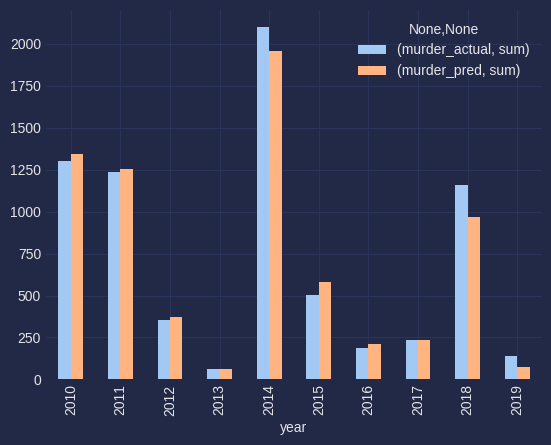

In [105]:
result.groupby('year')[['murder_actual','murder_pred']].agg(['sum']).plot(kind='bar')
plt.show()

In [106]:


print('Accuracy score : {}'.format(m.score(X_test,y_test)))


Accuracy score : 0.9492129968069896
